<a href="https://colab.research.google.com/github/yuusei-2001/General-Theory-of-Intelligent-Systems-Programming/blob/main/%E9%80%A3%E5%8B%A4%E8%BF%BD%E5%8A%A0ver1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install matplotlib

In [ ]:
!pip install datetime
!pip install jpholiday

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.8/247.8 kB 10.1 MB/s eta 0:00:00


In [ ]:
#休日の判定プログラム
"""
year = input('年度を入力してください: ')
month = input('月を入力してください：')

year = int(year)
month = int(month)
"""

年度を入力してください: 2024
月を入力してください：7


In [ ]:
import jpholiday
import datetime
# 休日の定義 (例えば土曜日と日曜日)

def is_weekend(day):
    return day % 7 == 5 or day % 7 == 6  # 土曜日は5、日曜日は6（0から始まる）

# 祝日の判定
def is_holiday(day):
    date = datetime.date(2024, 6, 1) + datetime.timedelta(days=day)
    return jpholiday.is_holiday(date)
"""
def isBizDay(day):
    Date = datetime.date(year, month, day)
    if Date.weekday() >= 5 or jpholiday.is_holiday(Date):
        return 0
    else:
        return 1
"""

'\ndef isBizDay(day):\n    Date = datetime.date(year, month, day)\n    if Date.weekday() >= 5 or jpholiday.is_holiday(Date):\n        return 0\n    else:\n        return 1\n'

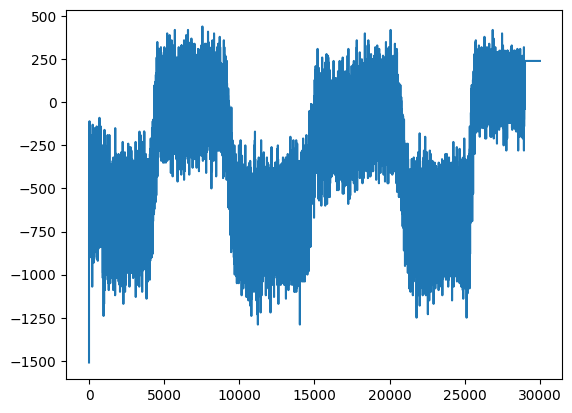

[['夜勤' '夜勤明け' '昼勤' '昼勤' '休み' '夜勤' '夜勤明け' '休み' '昼勤' '休み' '休み' '昼勤' '昼勤'
  '夜勤' '夜勤明け' '休み' '休み' '休み' '昼勤' '休み' '休み' '昼勤' '昼勤' '休み' '昼勤' '休み' '休み'
  '休み' '昼勤' '昼勤' '休み']
 ['夜勤' '夜勤明け' '昼勤' '休み' '休み' '昼勤' '昼勤' '休み' '夜勤' '夜勤明け' '休み' '昼勤' '昼勤'
  '休み' '夜勤' '夜勤明け' '昼勤' '休み' '休み' '休み' '昼勤' '休み' '昼勤' '昼勤' '休み' '夜勤'
  '夜勤明け' '休み' '昼勤' '夜勤' '夜勤明け']
 ['昼勤' '休み' '昼勤' '休み' '夜勤' '夜勤明け' '休み' '休み' '休み' '夜勤' '夜勤明け' '休み' '休み'
  '昼勤' '休み' '休み' '休み' '昼勤' '休み' '休み' '昼勤' '昼勤' '休み' '昼勤' '休み' '休み' '休み'
  '昼勤' '休み' '昼勤' '休み']
 ['昼勤' '昼勤' '休み' '昼勤' '休み' '休み' '休み' '休み' '休み' '夜勤' '夜勤明け' '休み' '休み' '昼勤'
  '休み' '夜勤' '夜勤明け' '休み' '休み' '休み' '昼勤' '夜勤' '夜勤明け' '昼勤' '夜勤' '夜勤明け' '休み'
  '昼勤' '昼勤' '昼勤' '昼勤']
 ['昼勤' '夜勤' '夜勤明け' '昼勤' '昼勤' '昼勤' '夜勤' '夜勤明け' '休み' '休み' '昼勤' '休み' '昼勤'
  '昼勤' '昼勤' '昼勤' '昼勤' '休み' '休み' '夜勤' '夜勤明け' '昼勤' '夜勤' '夜勤明け' '休み' '昼勤'
  '昼勤' '夜勤' '夜勤明け' '休み' '昼勤']
 ['夜勤' '夜勤明け' '昼勤' '休み' '昼勤' '休み' '休み' '夜勤' '夜勤明け' '昼勤' '休み' '夜勤' '夜勤明け'
  '休み' '休み' '昼勤' '休み' '夜勤' '夜勤明け' '昼勤' '休み' '昼勤' '昼勤' '夜勤' '夜勤明け' '休み'
  '休み' '

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 環境パラメータ
num_nurses = 10
num_days = 31  # 1ヶ月

# Qテーブルの初期化
Q = np.zeros((num_nurses * num_days, 4))  # 4つの行動: 休み、昼勤、夜勤、夜勤明け

# ハイパーパラメータ
alpha = 0.1  # 学習率
gamma = 0.99  # 割引率
epsilon = 0.3  # 探索率

# 状態の初期化
state = np.zeros((num_nurses, num_days), dtype=int)

# 報酬関数
def reward_function(state, day):
    # 日毎のシフト割当をカウント
    count_night = np.sum(state[:, day] == 2)
    count_day = np.sum(state[:, day] == 1)
    penalty = 0
    reward = 0

    # 初日に夜勤明けが配置されている個数　　修正済み：平日と休日の区別×
    count_after = np.sum(state[:, 0] == 3)
    # 夜勤と昼勤の人数制約
    if is_weekend(day) or is_holiday(day):
      if count_night == 1:
        reward += 30
      if count_day == 2:
        reward += 30
    else:
      if count_night == 1:
        reward += 30
      if count_day >= 6:
        reward += 30

    """#修正済み：これ強制的に1日目はペナルティ食らうことになるからいらなそう
    if count_after != 0:
        penalty += 30
    else:
        reward += 10
    """
    # 月末の勤務日数制約
    #work_days = np.sum(state[:, :] == 1) + np.sum(state[:, :] == 2)  # 全ナースの昼勤と夜勤の日数

    for nurse in range(num_nurses):
      if day == num_days - 1:
        nurse_work_days = np.sum(state[nurse, :] == 1) + np.sum(state[nurse, :] == 2)+np.sum(state[nurse, :] == 3)  # 修正済み：夜勤明けがカウントされていない
        if nurse_work_days > 20:
          penalty += 10  # 月末で勤務日数が20日を超えた場合のペナルティ
        if nurse_work_days < 12:
          penalty += 10  # 月末で勤務日数が12日以下の場合のペナルティ

        if nurse_work_days >= 12 and nurse_work_days <= 20:
          reward += 20


    #4日連続勤務を避ける
    #修正済み：最終日しか調べてなかった
      if day>3 and state[nurse, day - 3] != 0 and state[nurse, day - 2] != 0 and state[nurse, day - 1] != 0 and state[nurse, day] != 0:
        penalty += 10

    # 修正済み：連続休みを避ける(追加)
      if day>1 and state[nurse, day - 1] == 0 and state[nurse, day] == 0:
        penalty += 10

    # すべての条件を満たした場合に大きな報酬を与える
    if penalty == 0 and day == num_days - 1:
        reward += 100

    return reward - penalty

reward_list = []
count = []

def cbf(i, reward):
    count.append(i)
    reward_list.append(reward)

# Q学習アルゴリズム
for episode in range(30000):
    state = np.zeros((num_nurses, num_days), dtype=int)  # 状態の初期化
    if episode > 29000 :
      epsilon = 0
    elif episode > 25000:
      epsilon = 0.1
    else:
      epsilon = 0.3
    all_reward = 0
    for day in range(num_days):
        daily_rewards = []
        for nurse in range(num_nurses):
            current_state = nurse * num_days + day
            if day > 0 and state[nurse, day - 1] == 2:  # 夜勤の次の日は必ず夜勤明け
                action = 3
            elif day > 0 and state[nurse, day - 1] == 3:  # 夜勤明けの次の日は夜勤を避ける
                action = np.random.choice([0, 1])  # 休みか昼勤をランダムに選択
                action = np.argmax(Q[current_state])  # Q値の一番高い行動を選択(0,1,2,3)
                if(action==3 or action==2):
                  sorted_indices = np.argsort(Q[current_state])
                  action = sorted_indices[-2] if len(sorted_indices) > 1 else sorted_indices[-1]
                if(action==3 or action==2):
                  action = sorted_indices[-3]


            elif np.random.rand() < epsilon:
                action = np.random.randint(0, 4)  # 探索
            else:
                action = np.argmax(Q[current_state])  # Q値の一番高い行動を選択(0,1,2,3)
                if(action==3):
                  sorted_indices = np.argsort(Q[current_state])
                  action = sorted_indices[-2] if len(sorted_indices) > 1 else sorted_indices[-1]

            state[nurse, day] = action

        # 日毎の報酬計算とQ値の更新
        reward = reward_function(state, day)
        all_reward += reward
        daily_rewards.append(reward)
        for nurse in range(num_nurses):
            current_state = nurse * num_days + day
            action = state[nurse, day]
            next_state = nurse * num_days + (day + 1) % num_days if day < num_days - 1 else current_state
            Q[current_state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[current_state, action])
    cbf(episode, all_reward)

plt.plot(count, reward_list)
plt.show()

# スケジュールの出力
schedule = np.vectorize(lambda x: ['休み', '昼勤', '夜勤', '夜勤明け'][x])(state)
print(schedule)

In [ ]:
import jpholiday
import datetime
# 休日の定義 (例えば土曜日と日曜日)
def is_weekend(day):
    return day % 7 == 5 or day % 7 == 6  # 土曜日は5、日曜日は6（0から始まる）

# 祝日の判定
def is_holiday(day):
    date = datetime.date(2024, 6, 1) + datetime.timedelta(days=day)
    return jpholiday.is_holiday(date)

In [ ]:

# 制約チェック関数
def check_constraints(state):
    valid = True
    messages = []
    f_count = 0
    t_count = 0

    # 各ナースが一日に1つのシフトにのみ入る制約のチェック
    for n in range(num_nurses):
        for d in range(num_days):
          sum_value = np.sum(state[n, d] == np.array([0, 1, 2, 3]))
          if sum_value != 1:
              valid = False
              messages.append(f"ナース{n}が日{d}に複数のシフトに入っています。")
              print(state[n,d])


    # 夜勤の後は夜勤明けにする制約のチェック
    for n in range(num_nurses):
        for d in range(num_days - 1):
            if state[n, d ] == 2 and state[n, d+1 ] != 3:
                valid = False
                messages.append(f"ナース{n}が夜勤後に夜勤明けになっていません（日{d}）。")


    # 出勤日数は12日以上20日未満の制約のチェック
    for n in range(num_nurses):
        if (np.sum(state[n] == 0) >= 20) and (np.sum(state[n] == 0) < 12):
            valid = False
            messages.append(f"ナース{n}が十分な休みを確保していません。")

    # 昼勤の人数制約のチェック
    for d in range(num_days):
        if is_weekend(d) or is_holiday(d):
            if np.sum(state[:, d] == 1) != 2:
                valid = False
                messages.append(f"休日・祝日{d}の昼勤の人数が間違っています。")

        else:
            if np.sum(state[:, d] == 1) != 6:
                valid = False
                messages.append(f"営業日{d}の昼勤の人数が間違っています。")


    # 禁止シフトの制約チェック
    for n in range(num_nurses):
        for d in range(num_days - 1):
            if state[n, d ] == 2 and state[n, d +1] == 2:  # 連続夜勤は禁止
                valid = False
                messages.append(f"ナース{n}が連続夜勤になっています（日{d}から日{d+1}）。")

            if d < num_days - 2 and state[n, d ] == 3 and state[n, d +1] == 2:  # 夜勤明けの次の日に夜勤は禁止
                valid = False
                messages.append(f"ナース{n}が夜勤明けの次の日に夜勤になっています（日{d}から日{d+1}）。")


    # 連続勤務の制約チェック
    for n in range(num_nurses):
        for d in range(num_days - 4):
            if np.sum(state[n, d:d + 5] != 0) == 5:  # 5日連続勤務は禁止
                valid = False
                messages.append(f"ナース{n}が日{d}から日{d + 4}まで連続勤務が5日以上になっています。")


    return valid, messages,f_count,t_count

# 制約のチェックと結果の表示
valid, messages ,f_count ,t_count= check_constraints(state)
if valid:
    print("すべての制約が満たされています。")
else:
    print("以下の制約が満たされていません:")

    for message in messages:
       print(message)

# スケジュールの出力
schedule = np.vectorize(lambda x: ['休み', '昼勤', '夜勤', '夜勤明け'][x])(state)
print(schedule)

以下の制約が満たされていません:
営業日0の昼勤の人数が間違っています。
営業日1の昼勤の人数が間違っています。
営業日3の昼勤の人数が間違っています。
営業日4の昼勤の人数が間違っています。
休日・祝日5の昼勤の人数が間違っています。
営業日7の昼勤の人数が間違っています。
営業日8の昼勤の人数が間違っています。
営業日9の昼勤の人数が間違っています。
営業日10の昼勤の人数が間違っています。
営業日11の昼勤の人数が間違っています。
休日・祝日12の昼勤の人数が間違っています。
休日・祝日13の昼勤の人数が間違っています。
営業日14の昼勤の人数が間違っています。
営業日15の昼勤の人数が間違っています。
営業日16の昼勤の人数が間違っています。
営業日17の昼勤の人数が間違っています。
営業日18の昼勤の人数が間違っています。
休日・祝日19の昼勤の人数が間違っています。
休日・祝日20の昼勤の人数が間違っています。
営業日21の昼勤の人数が間違っています。
営業日22の昼勤の人数が間違っています。
営業日24の昼勤の人数が間違っています。
営業日25の昼勤の人数が間違っています。
営業日28の昼勤の人数が間違っています。
営業日29の昼勤の人数が間違っています。
営業日30の昼勤の人数が間違っています。
ナース3が日20から日24まで連続勤務が5日以上になっています。
ナース3が日21から日25まで連続勤務が5日以上になっています。
ナース4が日0から日4まで連続勤務が5日以上になっています。
ナース4が日1から日5まで連続勤務が5日以上になっています。
ナース4が日2から日6まで連続勤務が5日以上になっています。
ナース4が日3から日7まで連続勤務が5日以上になっています。
ナース4が日12から日16まで連続勤務が5日以上になっています。
ナース4が日19から日23まで連続勤務が5日以上になっています。
ナース6が日26から日30まで連続勤務が5日以上になっています。
ナース8が日17から日21まで連続勤務が5日以上になっています。
[['夜勤' '夜勤明け' '昼勤' '昼勤' '休み' '夜勤' '夜勤明け' '休み' '昼勤' '休み' '休み' '昼勤' '昼勤'
  '夜勤' '夜勤明け' '休み' '休み' '休み' '昼勤' '休み' '休み

In [ ]:

# 制約チェック関数
def check_constraints(state):
    valid = True
    messages = []
    f_count = 0
    t_count = 0

    # 出勤日数は12日以上20日未満の制約のチェック
    for n in range(num_nurses):
        if (np.sum(state[n] == 0) >= 20) and (np.sum(state[n] == 0) < 12):
            valid = False
            messages.append(f"ナース{n}が十分な休みを確保していません。")
            f_count +=1
        else:
          t_count+=1

    # 昼勤の人数制約のチェック
    for d in range(num_days):
        if is_weekend(d) or is_holiday(d):
            if np.sum(state[:, d] == 1) != 2:
                valid = False
                messages.append(f"休日・祝日{d}の昼勤の人数が間違っています。")
                f_count +=1
            else:
              t_count+=1
        else:
            if np.sum(state[:, d] == 1) != 6:
                valid = False
                messages.append(f"営業日{d}の昼勤の人数が間違っています。")
                f_count +=1
            else:
              t_count+=1


    # 連続勤務の制約チェック
    for n in range(num_nurses):
        for d in range(num_days - 4):
            if np.sum(state[n, d:d + 5] != 0) == 5:  # 5日連続勤務は禁止
                valid = False
                messages.append(f"ナース{n}が日{d}から日{d + 4}まで連続勤務が5日以上になっています。")
                f_count +=1
            else:
              t_count+=1

    return valid, messages,f_count,t_count

# 制約のチェックと結果の表示
valid, messages ,f_count ,t_count= check_constraints(state)
if valid:
    print("すべての制約が満たされています。")
else:
    print("満たされた制約数",t_count)
    print('満たされていない制約数',f_count)
    print("達成率",(t_count/(t_count+f_count))*100,"％")


# スケジュールの出力
schedule = np.vectorize(lambda x: ['休み', '昼勤', '夜勤', '夜勤明け'][x])(state)
print(schedule)

満たされた制約数 275
満たされていない制約数 36
達成率 88.42443729903538 ％
[['夜勤' '夜勤明け' '昼勤' '昼勤' '休み' '夜勤' '夜勤明け' '休み' '昼勤' '休み' '休み' '昼勤' '昼勤'
  '夜勤' '夜勤明け' '休み' '休み' '休み' '昼勤' '休み' '休み' '昼勤' '昼勤' '休み' '昼勤' '休み' '休み'
  '休み' '昼勤' '昼勤' '休み']
 ['夜勤' '夜勤明け' '昼勤' '休み' '休み' '昼勤' '昼勤' '休み' '夜勤' '夜勤明け' '休み' '昼勤' '昼勤'
  '休み' '夜勤' '夜勤明け' '昼勤' '休み' '休み' '休み' '昼勤' '休み' '昼勤' '昼勤' '休み' '夜勤'
  '夜勤明け' '休み' '昼勤' '夜勤' '夜勤明け']
 ['昼勤' '休み' '昼勤' '休み' '夜勤' '夜勤明け' '休み' '休み' '休み' '夜勤' '夜勤明け' '休み' '休み'
  '昼勤' '休み' '休み' '休み' '昼勤' '休み' '休み' '昼勤' '昼勤' '休み' '昼勤' '休み' '休み' '休み'
  '昼勤' '休み' '昼勤' '休み']
 ['昼勤' '昼勤' '休み' '昼勤' '休み' '休み' '休み' '休み' '休み' '夜勤' '夜勤明け' '休み' '休み' '昼勤'
  '休み' '夜勤' '夜勤明け' '休み' '休み' '休み' '昼勤' '夜勤' '夜勤明け' '昼勤' '夜勤' '夜勤明け' '休み'
  '昼勤' '昼勤' '昼勤' '昼勤']
 ['昼勤' '夜勤' '夜勤明け' '昼勤' '昼勤' '昼勤' '夜勤' '夜勤明け' '休み' '休み' '昼勤' '休み' '昼勤'
  '昼勤' '昼勤' '昼勤' '昼勤' '休み' '休み' '夜勤' '夜勤明け' '昼勤' '夜勤' '夜勤明け' '休み' '昼勤'
  '昼勤' '夜勤' '夜勤明け' '休み' '昼勤']
 ['夜勤' '夜勤明け' '昼勤' '休み' '昼勤' '休み' '休み' '夜勤' '夜勤明け' '昼勤' '休み' '夜勤' '夜勤明け'
  '休み' '休み' '昼勤' '休み' '夜勤' 